In [1]:
import os
import ast
import shutil
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.image as img
from ultralytics import YOLO

%matplotlib inline

In [2]:
ROOT_PATH = Path(os.getcwd()).parent.as_posix()
DATASET_PATH = Path(ROOT_PATH, "datasets/storm-damage-detection/working/sdd/sdd.yaml").as_posix()
RUN_PATH = Path(ROOT_PATH, "runs").as_posix()
PRETRAINED_PATH = Path(ROOT_PATH, "pretrained").as_posix()
TEST_INPUTS_DIR = Path(ROOT_PATH, "datasets/storm-damage-detection/working/sdd/test/images").as_posix()

## Training

In [3]:
model_name = "yolov8m.pt" # yolov8n.pt yolov8s.pt yolov8m.pt yolov8l.pt yolov8x.pt
model = YOLO(model_name, task="detect")
model.info()

100%|██████████| 49.7M/49.7M [00:00<00:00, 231MB/s]


YOLOv8m summary: 295 layers, 25902640 parameters, 0 gradients


(295, 25902640, 0, 0.0)

In [4]:
train_results = model.train(
    data=DATASET_PATH, 
    epochs=1000, 
    imgsz=512,
    project=RUN_PATH,
    name=None, # YOLOv8m default
)

New https://pypi.org/project/ultralytics/8.1.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (Tesla T4, 15978MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/sdd.yaml, epochs=1000, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=/home/jovyan/storm-damage-detection/runs, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augmen

100%|██████████| 755k/755k [00:00<00:00, 83.3MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 


  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384, 576, 3, 2]              
  8                  -1  2   3985920  ultralytics.nn.modules.block.C2f             [576, 576, 2, True]           
  9                  -1  1    831168  ultralytics.nn.modules.block.SPPF            [576,

100%|██████████| 6.23M/6.23M [00:00<00:00, 239MB/s]


AMP: checks passed ✅


train: Scanning /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/train/labels... 144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 144/144 [00:00<00:00, 1813.32it/s]

train: New cache created: /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 34, len(boxes) = 2746. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/valid/labels... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<00:00, 22192.08it/s]

val: New cache created: /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/valid/labels.cache


Plotting labels to /home/jovyan/storm-damage-detection/runs/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to /home/jovyan/storm-damage-detection/runs/train
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      4.89G      1.785      3.897      1.613        391        512: 100%|██████████| 9/9 [00:03<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all         18        419      0.601       0.23      0.152     0.0923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      4.79G      1.316      1.683      1.278        718        512: 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


                   all         18        419      0.437      0.243      0.219      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      5.06G      1.239      1.402      1.218        443        512: 100%|██████████| 9/9 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         18        419      0.436      0.299      0.251      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      5.01G      1.159      1.174      1.162        514        512: 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         18        419      0.438      0.344      0.222      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000       5.1G      1.123      1.186      1.161        370        512: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]


                   all         18        419      0.278      0.277      0.193       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      5.08G      1.171       1.25      1.207        399        512: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all         18        419      0.364       0.44      0.298      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      5.05G      1.138      1.136      1.191        439        512: 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         18        419      0.479      0.385      0.226      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      4.89G      1.173      1.202      1.225        392        512: 100%|██████████| 9/9 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         18        419       0.18      0.276     0.0962     0.0683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      4.98G      1.126      1.113      1.221        520        512: 100%|██████████| 9/9 [00:02<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


                   all         18        419      0.311      0.389      0.316      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      4.95G      1.116      1.104      1.201        560        512: 100%|██████████| 9/9 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]

                   all         18        419      0.269      0.499      0.271       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000       5.3G      1.092      1.049      1.179        506        512: 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all         18        419      0.202      0.545      0.155      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      5.15G      1.154      1.119      1.212        337        512: 100%|██████████| 9/9 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


                   all         18        419      0.221       0.44      0.195      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      5.08G      1.169      1.121      1.245        283        512: 100%|██████████| 9/9 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


                   all         18        419      0.204      0.428      0.183      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000       5.4G      1.098     0.9985      1.144        430        512: 100%|██████████| 9/9 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


                   all         18        419      0.166      0.427      0.152      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      5.41G      1.151      1.147      1.219        444        512: 100%|██████████| 9/9 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


                   all         18        419      0.184      0.506      0.194      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      5.01G      1.179       1.08      1.231        388        512: 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all         18        419      0.105      0.428        0.1      0.068



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      5.01G      1.138      1.126      1.204        513        512: 100%|██████████| 9/9 [00:02<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]

                   all         18        419      0.209      0.457      0.207      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      5.23G      1.079     0.9694      1.157        451        512: 100%|██████████| 9/9 [00:02<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


                   all         18        419      0.675      0.283      0.307      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      5.14G      1.076     0.9759      1.177        527        512: 100%|██████████| 9/9 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


                   all         18        419      0.314      0.551      0.298      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      4.91G      1.108      1.012      1.186        468        512: 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


                   all         18        419      0.259      0.369      0.191      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      5.05G      1.121      1.046      1.224        326        512: 100%|██████████| 9/9 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         18        419      0.322      0.255      0.243       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      5.06G      1.077       0.97      1.182        454        512: 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all         18        419      0.307      0.484      0.303      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      4.57G      1.101     0.9533      1.182        415        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]

                   all         18        419      0.336      0.551      0.329      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      5.03G      1.072      0.972      1.149        406        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all         18        419      0.378      0.501      0.396      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000       5.2G      1.064     0.9114      1.151        608        512: 100%|██████████| 9/9 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all         18        419      0.377      0.519      0.349      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000         5G      1.059     0.9201      1.151        308        512: 100%|██████████| 9/9 [00:02<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         18        419      0.372      0.502      0.402      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      5.25G      1.075     0.9855       1.18        299        512: 100%|██████████| 9/9 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]

                   all         18        419      0.347      0.514      0.425      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      4.95G      1.118     0.9994      1.215        437        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all         18        419      0.734      0.317      0.395      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000       5.2G      1.091     0.9799      1.162        555        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all         18        419      0.478      0.464        0.4      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      4.86G      1.057     0.9145      1.162        392        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all         18        419      0.506      0.402      0.471      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      4.51G      1.031     0.8802      1.144        335        512: 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


                   all         18        419      0.364      0.415      0.395      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      5.33G      1.105     0.9523      1.187        394        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         18        419      0.379      0.568      0.383      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      5.03G      1.028     0.9036      1.139        309        512: 100%|██████████| 9/9 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


                   all         18        419      0.367      0.562       0.36       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      5.13G      1.008      0.865      1.125        707        512: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all         18        419       0.37      0.428      0.252      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      5.02G      1.025     0.8948      1.169        499        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


                   all         18        419       0.24       0.62      0.261      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      4.92G      1.022     0.8934      1.166        269        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         18        419      0.404      0.504      0.304      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      4.61G      1.042     0.8936      1.158        312        512: 100%|██████████| 9/9 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         18        419      0.393      0.562      0.333      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      5.23G     0.9605     0.7938      1.103        419        512: 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


                   all         18        419      0.397      0.602      0.418      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      5.11G     0.9964     0.8054      1.102        424        512: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         18        419      0.333      0.585      0.407      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000         5G      1.006     0.7693      1.115        440        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


                   all         18        419      0.326      0.578      0.396      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      4.98G      1.023     0.8357      1.162        574        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         18        419      0.454      0.484      0.456      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      4.89G     0.9439     0.8056      1.102        509        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         18        419      0.383      0.543      0.444      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      5.08G     0.9642     0.7839      1.107        470        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         18        419      0.474      0.486      0.428      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      5.22G     0.9622     0.7877      1.089        358        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


                   all         18        419      0.443      0.509      0.414      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      5.02G     0.9793     0.8266       1.11        607        512: 100%|██████████| 9/9 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]

                   all         18        419      0.452      0.475      0.455      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000         5G     0.9541     0.7538      1.121        477        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]

                   all         18        419       0.47      0.509      0.456       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      5.17G     0.9858       0.83      1.131        392        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


                   all         18        419      0.515      0.459      0.428      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      5.16G      1.007     0.8261      1.126        404        512: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         18        419      0.419      0.419      0.402       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      5.22G     0.9787     0.7788      1.116        413        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


                   all         18        419      0.446      0.521       0.45      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      5.38G     0.9914     0.7787       1.13        278        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         18        419      0.415      0.465      0.476      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      5.02G     0.9709     0.8133      1.093        321        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         18        419       0.56      0.451      0.466      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      5.03G     0.9945     0.7605      1.141        326        512: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         18        419      0.472      0.517      0.471      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      5.35G     0.9498     0.7338      1.074        355        512: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all         18        419      0.404      0.352      0.314       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      5.12G     0.9846     0.8042      1.107        335        512: 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         18        419      0.356      0.357      0.311      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      5.14G     0.9586     0.7641      1.102        285        512: 100%|██████████| 9/9 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all         18        419      0.364      0.573      0.409      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      5.23G     0.9649      0.783      1.125        488        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all         18        419      0.623      0.372      0.382      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      4.72G     0.8837     0.7119      1.074        363        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all         18        419      0.585      0.361      0.369      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      5.22G     0.9265     0.7383      1.095        368        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         18        419      0.364      0.408      0.389      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      5.26G     0.9173     0.7024      1.088        350        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all         18        419      0.407      0.402        0.4      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      5.03G     0.9501     0.7368       1.13        383        512: 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         18        419      0.513      0.389      0.441      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      5.07G     0.9095      0.695      1.062        352        512: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         18        419      0.447      0.536      0.456      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      4.98G     0.9202     0.7504      1.095        492        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         18        419      0.441      0.467      0.435      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      4.63G     0.8917     0.7138      1.065        375        512: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         18        419      0.345      0.508      0.375       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      4.93G      0.898     0.6904      1.076        463        512: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         18        419      0.352      0.449      0.374      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      5.11G     0.9149     0.7719        1.1        250        512: 100%|██████████| 9/9 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         18        419      0.363      0.457       0.37      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      5.26G     0.9012     0.7012      1.068        493        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         18        419      0.323      0.526      0.387      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      5.27G      0.912     0.6804      1.066        442        512: 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         18        419      0.389      0.342      0.362       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      5.53G     0.9239     0.6747      1.071        424        512: 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all         18        419      0.384       0.45      0.401      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      5.16G     0.9064     0.6793      1.088        382        512: 100%|██████████| 9/9 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         18        419      0.444      0.417      0.412      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      5.22G     0.8633     0.6687      1.062        375        512: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         18        419       0.37      0.405       0.39      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      5.25G     0.8829     0.6508      1.067        424        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         18        419      0.382      0.427      0.377      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      4.92G     0.8973     0.6671      1.062        383        512: 100%|██████████| 9/9 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         18        419      0.407       0.51      0.403      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000       5.2G     0.9386     0.7164       1.13        308        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         18        419      0.286      0.404      0.351      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      4.91G     0.9245     0.6795      1.067        456        512: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         18        419      0.288      0.591      0.381      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000       5.1G     0.9631     0.7069      1.125        373        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         18        419      0.376      0.425      0.393      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      4.98G      0.915     0.6811      1.084        387        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         18        419      0.399      0.465      0.426      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      4.95G       0.87     0.6402      1.075        435        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]

                   all         18        419      0.353      0.456       0.43      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      5.04G     0.9541     0.6809      1.124        319        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all         18        419      0.392      0.441      0.412      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000       5.1G     0.9203     0.6568      1.088        404        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         18        419      0.316      0.462      0.382      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      5.05G     0.9014     0.6494      1.077        307        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         18        419      0.702      0.376       0.41      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      4.85G     0.8661     0.6153      1.064        398        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all         18        419      0.446      0.474      0.445      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      5.05G     0.9117     0.6097      1.064        455        512: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         18        419       0.39      0.553      0.425      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000       5.2G     0.8702     0.6382      1.066        522        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         18        419      0.423      0.442      0.373      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      4.93G     0.8471     0.6437      1.046        416        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         18        419      0.497      0.519      0.459      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      5.17G     0.8315     0.5826      1.027        396        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


                   all         18        419      0.405       0.56      0.415      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      5.08G     0.8396      0.581       1.04        567        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         18        419      0.409      0.558      0.466      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      5.01G     0.8756     0.6222      1.076        430        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         18        419      0.376      0.486      0.418       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      4.98G     0.8352     0.6114      1.033        349        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         18        419      0.377      0.421      0.353      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      4.96G     0.8666     0.6281       1.07        502        512: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         18        419      0.287      0.561      0.381      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      5.05G     0.8337     0.5903      1.042        456        512: 100%|██████████| 9/9 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         18        419      0.393      0.444      0.398      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      5.24G     0.8447      0.578      1.038        381        512: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all         18        419      0.475      0.415      0.369      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      5.03G     0.8482     0.5752      1.044        369        512: 100%|██████████| 9/9 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         18        419      0.356      0.484      0.386      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      4.97G     0.8635     0.6008      1.055        297        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         18        419      0.409      0.491      0.406      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      5.25G     0.8479     0.5547      1.025        413        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         18        419      0.382      0.538      0.418      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      5.33G     0.8471     0.5467      1.041        392        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         18        419      0.423       0.42      0.392      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000       5.3G     0.8873     0.5826      1.051        487        512: 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         18        419      0.448      0.395      0.415      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      4.99G     0.8102     0.5538      1.033        234        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         18        419      0.431      0.378      0.415      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      5.26G      0.835     0.5425      1.029        448        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         18        419        0.4      0.454      0.443      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      4.84G      0.837      0.538      1.041        398        512: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         18        419      0.471      0.552      0.465      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      4.82G     0.8669     0.5432      1.057        410        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         18        419      0.411      0.601      0.472      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000         5G     0.8282     0.5399      1.026        457        512: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         18        419      0.474      0.538      0.466      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      4.95G     0.8551      0.555      1.055        463        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all         18        419      0.455      0.464      0.456      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      5.15G      0.852     0.5682      1.048        295        512: 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         18        419      0.522      0.494      0.463      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      5.18G      0.862     0.5843      1.056        432        512: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         18        419      0.426      0.479      0.463      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      5.07G     0.8569     0.5602      1.054        572        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]

                   all         18        419      0.554      0.457      0.457      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      4.98G     0.8163     0.5607       1.05        317        512: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         18        419       0.49      0.467      0.468      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      5.25G     0.8169     0.5228      1.035        404        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         18        419      0.472      0.522      0.466      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      5.11G     0.7903     0.5227      1.028        442        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all         18        419      0.407       0.49      0.401       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      5.11G     0.8132     0.5617      1.035        397        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         18        419      0.385      0.358      0.393      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      5.05G     0.7955     0.5345      1.032        450        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         18        419      0.564       0.41      0.433       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      4.57G     0.8451     0.5399      1.032        518        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         18        419      0.355      0.527       0.42      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      5.08G     0.8047     0.5653       1.03        442        512: 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         18        419      0.463      0.456      0.416      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      4.84G     0.8222     0.5618      1.023        447        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         18        419      0.494      0.475      0.445      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      4.99G     0.8335     0.5643      1.044        381        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


                   all         18        419      0.362      0.556      0.424      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      4.82G     0.8084     0.5228      1.015        410        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         18        419      0.442      0.372      0.413      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      5.31G     0.8499     0.5806      1.046        369        512: 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         18        419      0.376      0.442      0.402      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      5.12G     0.8075     0.5636      1.019        378        512: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         18        419      0.437      0.385      0.394      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000       5.2G     0.7974      0.535      1.002        404        512: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         18        419      0.629      0.392      0.379      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      5.17G     0.8011     0.5325      1.018        548        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         18        419      0.328       0.41      0.381      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      5.54G     0.7885     0.5119     0.9868        559        512: 100%|██████████| 9/9 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         18        419      0.385      0.394      0.383      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      5.33G     0.8128     0.5207       1.01        418        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         18        419      0.415      0.477      0.432      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      5.06G     0.7917     0.5061      1.003        496        512: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         18        419      0.376      0.498      0.406      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      5.09G     0.7926     0.5178      1.006        384        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         18        419      0.348      0.603      0.418      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      5.07G     0.7992     0.5211      1.018        410        512: 100%|██████████| 9/9 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         18        419      0.491      0.513      0.414        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      5.27G     0.7814     0.5059      1.012        569        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         18        419       0.44      0.567      0.443      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      4.84G     0.7844     0.5028      1.015        515        512: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         18        419      0.374      0.441      0.399      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      5.19G     0.7809     0.5315      1.026        363        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         18        419      0.407      0.413      0.397      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      5.21G     0.7865     0.5259     0.9957        444        512: 100%|██████████| 9/9 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         18        419      0.357      0.431      0.395      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      4.96G     0.7959     0.5267      1.016        549        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         18        419      0.349      0.407      0.373      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      5.19G     0.7859     0.4909      1.007        559        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         18        419      0.426      0.538      0.424      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000       5.1G     0.7631     0.5019     0.9984        533        512: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]

                   all         18        419        0.5      0.513       0.49      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000      5.02G     0.8169     0.5544      1.046        439        512: 100%|██████████| 9/9 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         18        419      0.358      0.554      0.426      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      4.95G     0.7952     0.5156      1.011        389        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         18        419      0.672      0.343      0.432      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000      5.16G     0.7423     0.4819     0.9881        426        512: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         18        419      0.398      0.485      0.396      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000      5.33G     0.7644     0.4844      0.989        581        512: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         18        419      0.487      0.343      0.376      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000         5G     0.7479     0.4836     0.9801        421        512: 100%|██████████| 9/9 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         18        419      0.633      0.372      0.345      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000      5.04G     0.7461     0.4844     0.9924        440        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         18        419      0.351      0.408      0.361      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000         5G     0.7706     0.4915      1.016        443        512: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         18        419      0.419      0.374       0.39      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000      5.02G     0.7537     0.4735     0.9886        575        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         18        419      0.433      0.407      0.397      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      5.01G     0.7557     0.4689     0.9852        385        512: 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         18        419      0.428      0.482      0.433      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      4.98G     0.7486     0.4624      1.005        395        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         18        419      0.509      0.466      0.458      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      5.08G     0.7457     0.4825     0.9933        366        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all         18        419      0.592      0.437       0.47       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      4.78G     0.7446     0.4714     0.9808        379        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         18        419      0.437      0.525      0.433      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      5.05G     0.7675     0.4882     0.9927        361        512: 100%|██████████| 9/9 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         18        419      0.615      0.395      0.397      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      5.22G     0.7411     0.4846     0.9908        474        512: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         18        419      0.453      0.429      0.425      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000      4.65G     0.7301     0.4565     0.9891        352        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         18        419      0.402      0.471      0.451      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000      4.86G     0.7297     0.4644     0.9732        460        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         18        419      0.559      0.431      0.464      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      4.93G     0.7501     0.5075     0.9954        287        512: 100%|██████████| 9/9 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         18        419      0.411      0.578      0.466      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000      5.16G      0.745     0.4892     0.9876        395        512: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all         18        419      0.431      0.471      0.419      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      5.05G     0.6937     0.4543      0.949        439        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         18        419      0.415      0.362      0.388      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000      4.95G     0.7553     0.5138     0.9878        450        512: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         18        419      0.335      0.594      0.405      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000       4.9G     0.7554     0.4881     0.9931        409        512: 100%|██████████| 9/9 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         18        419      0.574      0.479      0.459      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      5.05G     0.7818     0.4954     0.9998        300        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         18        419        0.5      0.454      0.434      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000      5.17G     0.7664     0.4961     0.9897        417        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         18        419      0.411      0.487       0.39      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      4.95G     0.7701     0.5202      1.009        315        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


                   all         18        419      0.335       0.49      0.366      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000      5.17G     0.7538     0.5034     0.9911        330        512: 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         18        419      0.467      0.356      0.368      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      4.79G      0.715     0.4717     0.9626        415        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         18        419      0.507      0.356      0.378      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      5.22G     0.7192      0.471      0.977        356        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         18        419       0.52      0.349      0.366      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000      5.03G     0.7469     0.4923     0.9964        334        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all         18        419      0.316      0.445      0.344      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000      4.98G     0.7167     0.4549     0.9754        563        512: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]

                   all         18        419      0.328      0.473      0.337      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000      4.99G     0.7347      0.491     0.9997        413        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         18        419      0.366       0.45      0.356      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/1000      4.85G     0.7271       0.47     0.9872        347        512: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         18        419      0.394      0.396      0.377      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/1000      4.75G     0.7055     0.4472     0.9717        395        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         18        419      0.353      0.474      0.382      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   164/1000      5.09G      0.703     0.4511     0.9648        543        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         18        419      0.361      0.529      0.382       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   165/1000      5.14G     0.7064     0.4476     0.9764        337        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         18        419      0.503      0.455      0.424      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   166/1000      5.28G     0.6954     0.4454     0.9484        497        512: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         18        419      0.448      0.358      0.391      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   167/1000      5.16G     0.7079     0.4501     0.9655        275        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all         18        419       0.46      0.392      0.394      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   168/1000      5.07G     0.7174     0.4461     0.9687        500        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         18        419      0.498      0.458      0.424      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   169/1000      5.06G     0.6802      0.422     0.9555        485        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         18        419      0.479      0.435      0.402      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   170/1000      5.08G     0.7032     0.4348     0.9793        447        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         18        419       0.34       0.49      0.398      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   171/1000      5.11G     0.6965     0.4395     0.9724        471        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         18        419      0.365      0.484      0.376      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   172/1000       5.2G     0.7217     0.4516     0.9647        442        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         18        419      0.352      0.489      0.398      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   173/1000      4.73G     0.7365     0.4872      0.989        199        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         18        419      0.574      0.368      0.429      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   174/1000      5.09G      0.735     0.4545     0.9789        355        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         18        419      0.539      0.373      0.422      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   175/1000      5.21G     0.6939     0.4456     0.9626        383        512: 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         18        419      0.475      0.407      0.418      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   176/1000      4.61G      0.689     0.4281     0.9692        259        512: 100%|██████████| 9/9 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         18        419      0.349      0.511      0.384      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   177/1000      5.06G     0.6949     0.4459     0.9656        490        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         18        419      0.552      0.333      0.377      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   178/1000      5.09G     0.6726     0.4239     0.9591        471        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         18        419      0.644      0.351      0.427      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   179/1000      4.65G     0.6839     0.4276     0.9508        432        512: 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         18        419      0.423       0.48       0.44      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   180/1000      4.91G     0.6883      0.443       0.96        380        512: 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all         18        419      0.357      0.497       0.42      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   181/1000      4.79G     0.7053     0.4332     0.9563        239        512: 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all         18        419      0.452      0.435      0.419      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   182/1000      5.01G      0.707     0.4299     0.9727        460        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         18        419      0.435       0.43       0.41      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   183/1000      4.84G     0.7128     0.4195     0.9532        419        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         18        419       0.54      0.394      0.403      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   184/1000      5.06G     0.7309     0.4476     0.9711        432        512: 100%|██████████| 9/9 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         18        419       0.44      0.394      0.397       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   185/1000      4.88G     0.6893     0.4305     0.9634        594        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         18        419      0.375      0.467      0.404      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   186/1000      5.24G     0.7198     0.4411     0.9712        559        512: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         18        419      0.351      0.558      0.433      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   187/1000      5.04G     0.6968     0.4275     0.9573        377        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         18        419      0.381      0.549      0.441      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   188/1000      5.18G     0.7101     0.4328     0.9606        413        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         18        419      0.467      0.432      0.469      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   189/1000      4.99G     0.7005     0.4163     0.9508        541        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         18        419       0.37      0.563       0.48      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   190/1000      4.92G     0.7051     0.4181     0.9638        309        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         18        419      0.545      0.386      0.464      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   191/1000      4.83G     0.6924     0.4283      0.962        461        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         18        419      0.423      0.511      0.447      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   192/1000      4.79G     0.7057     0.4378     0.9684        410        512: 100%|██████████| 9/9 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         18        419       0.47      0.496      0.441      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   193/1000      5.05G      0.682     0.4324     0.9613        311        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         18        419      0.441      0.439      0.437      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   194/1000      5.05G      0.667     0.4185     0.9657        444        512: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         18        419      0.503       0.41      0.422      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   195/1000      5.07G     0.6685     0.4322     0.9684        447        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         18        419       0.42       0.44      0.383      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   196/1000      4.99G     0.6782     0.4233     0.9426        515        512: 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         18        419      0.361      0.386      0.393      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   197/1000      4.95G     0.6726     0.4228     0.9595        392        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         18        419      0.419      0.391      0.402      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   198/1000      5.44G     0.6263     0.3938     0.9241        370        512: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         18        419      0.451      0.432      0.434      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   199/1000      4.57G     0.6486     0.4123     0.9524        611        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all         18        419      0.415      0.402        0.4      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   200/1000      4.59G     0.6631     0.4316     0.9522        425        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all         18        419      0.555      0.356      0.441      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   201/1000      5.01G     0.6522     0.4043     0.9377        356        512: 100%|██████████| 9/9 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         18        419       0.38      0.481      0.447      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   202/1000      5.04G     0.6408     0.4061     0.9468        318        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         18        419      0.354      0.563      0.469      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   203/1000      5.22G     0.6193      0.386     0.9293        587        512: 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         18        419      0.422       0.49       0.43      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   204/1000      5.01G     0.6687     0.4275     0.9588        516        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         18        419        0.4      0.438      0.392       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   205/1000      4.88G     0.6617     0.4282     0.9496        376        512: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         18        419      0.409      0.467      0.357       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   206/1000      5.11G     0.6673     0.4262      0.947        501        512: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         18        419      0.346      0.522       0.37      0.273
Stopping training early as no improvement observed in last 100 epochs. Best results observed at epoch 106, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



206 epochs completed in 0.319 hours.
Optimizer stripped from /home/jovyan/storm-damage-detection/runs/train/weights/last.pt, 52.0MB
Optimizer stripped from /home/jovyan/storm-damage-detection/runs/train/weights/best.pt, 52.0MB

Validating /home/jovyan/storm-damage-detection/runs/train/weights/best.pt...
Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (Tesla T4, 15978MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


                   all         18        419      0.491      0.467      0.468      0.361
{0: 'damagedcommercialbuilding'}         18          9      0.489      0.333      0.337      0.302
{1: 'damagedresidentialbuilding'}         18         42       0.49       0.31      0.359      0.259
{2: 'undamagedcommercialbuilding'}         18         23      0.245      0.391      0.314      0.217
{3: 'undamagedresidentialbuilding'}         18        345      0.742      0.835      0.864      0.667
Speed: 0.1ms preprocess, 8.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /home/jovyan/storm-damage-detection/runs/train


## Evaluation

In [5]:
# Getting some paths right
save_dir = train_results.save_dir

In [6]:
print(f"mAP with IoU 50% = {train_results.box.map50}") # 0.4682549294243663

mAP with IoU 50% = 0.4682549294243663


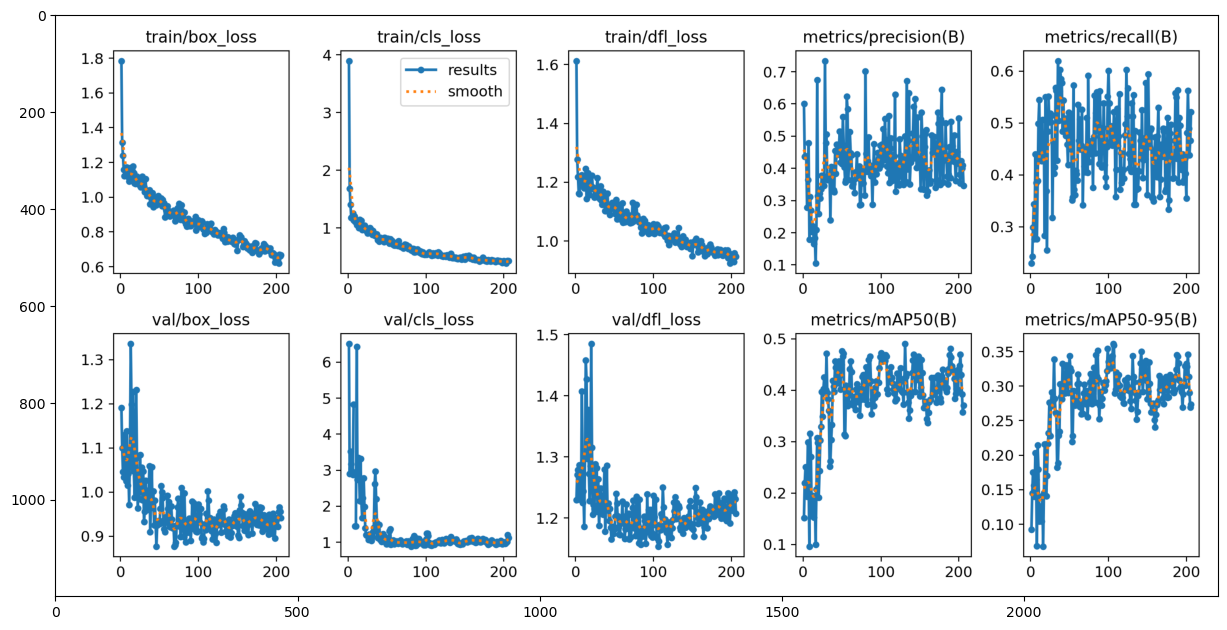

In [7]:
plt.figure(figsize=(15, 10))
results = img.imread(Path(save_dir, "results.png"))   
plt.imshow(results) 
plt.show()

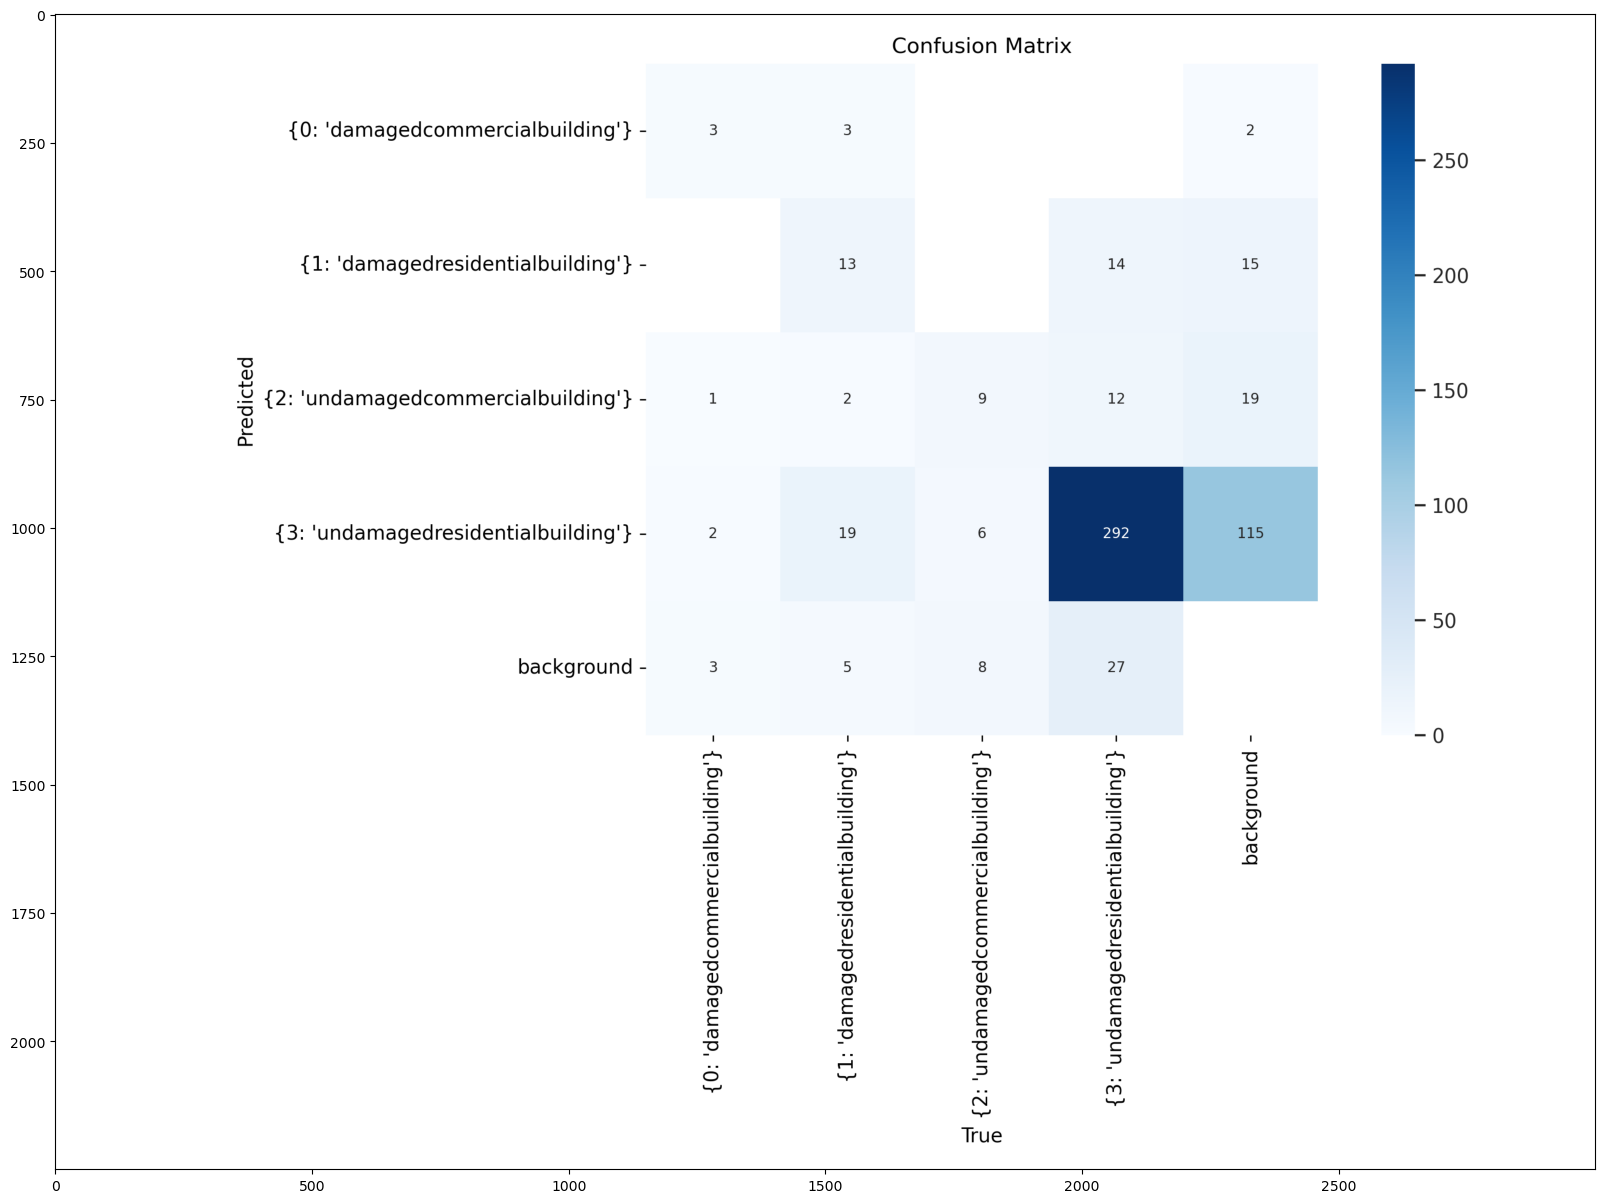

In [8]:
plt.figure(figsize=(20,15))  
# reading the image 
cf = img.imread(Path(save_dir, "confusion_matrix.png")) 
# displaying the image 
plt.imshow(cf) 
plt.show()

## Testing

In [9]:
results_dir = Path(save_dir, "submission_data"); os.makedirs(results_dir, exist_ok=True) # directory to store test output data
best_path = Path(save_dir, "weights/best.pt")

# Double-check with train_results.names
decoding_of_predictions = {0: 'damagedcommercialbuilding', 1: 'damagedresidentialbuilding', 2: 'undamagedcommercialbuilding', 3: 'undamagedresidentialbuilding'}

# Load the current best model
model = YOLO(best_path)

In [10]:
test_results = model.val(
    split="test",
    imgsz=512,
    conf=0.25,
    iou=0.5,
    project=RUN_PATH,
)

Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (Tesla T4, 15978MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients


val: Scanning /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/labels... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<00:00, 1510.19it/s]

val: New cache created: /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]


                   all         12        234      0.386      0.368      0.363      0.298
{0: 'damagedcommercialbuilding'}         12         15       0.24      0.133      0.125      0.113
{1: 'damagedresidentialbuilding'}         12         42      0.399      0.237       0.27       0.22
{2: 'undamagedcommercialbuilding'}         12         20      0.267       0.35      0.284      0.238
{3: 'undamagedresidentialbuilding'}         12        157      0.638      0.752      0.774      0.623
Speed: 0.2ms preprocess, 17.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /home/jovyan/storm-damage-detection/runs/val


In [11]:
test_results = model.predict(
    TEST_INPUTS_DIR,
    imgsz=512, iou=0.5, conf=0.25, 
    save=True, save_txt=True, project=RUN_PATH,
)


image 1/12 /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/images/Validation_Post_Event_001_jpg.rf.816958fdf5bd6099b8a5e2b668d007e9.jpg: 512x512 1 {0: 'damagedcommercialbuilding'}, 4 {1: 'damagedresidentialbuilding'}s, 3 {2: 'undamagedcommercialbuilding'}s, 29 {3: 'undamagedresidentialbuilding'}s, 25.1ms
image 2/12 /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/images/Validation_Post_Event_002_jpg.rf.23111ea1920da9b374c3919e1f423dcd.jpg: 512x512 1 {1: 'damagedresidentialbuilding'}, 12 {3: 'undamagedresidentialbuilding'}s, 25.2ms
image 3/12 /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/images/Validation_Post_Event_003_jpg.rf.6f70407de0a1ee2cd0f1c8008387e696.jpg: 512x512 1 {0: 'damagedcommercialbuilding'}, 3 {1: 'damagedresidentialbuilding'}s, 3 {2: 'undamagedcommercialbuilding'}s, 13 {3: 'undamagedresidentialbuilding'}s, 25.3ms
image 4/12 /home/jovyan/storm-damage-detection

In [12]:
for r in test_results:
    confidences = r.boxes.conf.cpu().numpy().tolist()
    class_indices = r.boxes.cls.cpu().numpy().tolist()
    class_names = [decoding_of_predictions[int(clss_ix)] for clss_ix in class_indices]
    bounding_boxes = r.boxes.xyxy.cpu().numpy()

    # Check if bounding boxes, confidences and class names match
    if len(bounding_boxes) != len(confidences) or len(bounding_boxes) != len(class_names):
        print("Error: Number of bounding boxes, confidences, and class names should be the same.")
        continue
    
    text_file_name = os.path.splitext(os.path.basename(r.path))[0] # Get the img filename
    text_file_name = text_file_name.split(".")[0].rstrip("_jpg") # remove extra info in filename produced by roboflow

    # Creating a new .txt file for each image in the submission_directory
    with open(Path(results_dir, f"{text_file_name}.txt"), "w") as file:
        for i in range(len(bounding_boxes)):
            # Get coordinates of each bounding box
            left, top, right, bottom = bounding_boxes[i]
            # Write content to file in desired format
            file.write(f"{class_names[i]} {confidences[i]} {left} {top} {right} {bottom}\n")
    print("Output files generated successfully.")
    

Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.


In [13]:
# Define your source directory and the destination where the zip file will be created
destination_zip = Path(results_dir.parent, "submission")

print("source", results_dir)
print("dest", destination_zip)

# Create a zip file from the directory
shutil.make_archive(destination_zip, 'zip', results_dir)

print(f"Directory {results_dir} has been successfully zipped into {destination_zip}.")

source /home/jovyan/storm-damage-detection/runs/train/submission_data
dest /home/jovyan/storm-damage-detection/runs/train/submission
Directory /home/jovyan/storm-damage-detection/runs/train/submission_data has been successfully zipped into /home/jovyan/storm-damage-detection/runs/train/submission.
